[]

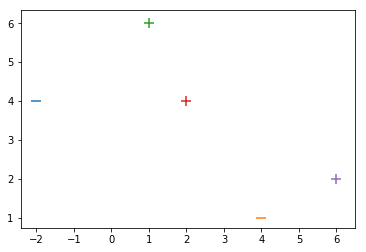

In [1]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
#Input data
x = np.array([
[-2,4,-1], [4,1,-1], [1, 6, -1], [2, 4, -1], [6, 2, -1],
])
#output label
y = np.array([-1, -1, 1, 1, 1])
for val, inp in enumerate(x): 
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5) 
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5) 
plt.plot()

[]

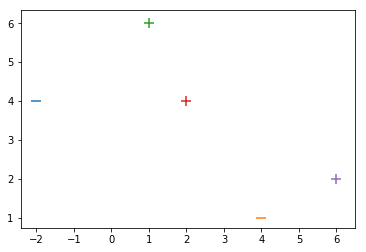

In [2]:
for val, inp in enumerate(x): 
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5) 
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5) 
plt.plot()

In [3]:
def svm_function(x,y): #initilizing weight
    w = np.zeros(len(x[0])) #initialize learning rate 
    l_rate = 1
#epoch
    epoch = 100000 #output list
    out = []
#training svm
    for e in range(epoch):
        for i, val in enumerate(x): 
            val1 = np.dot(x[i], w)
            if (y[i]*val1 < 1):
                w = w + l_rate * ((y[i]*x[i]) - (2*(1/epoch)*w))
            else:
                w = w + l_rate * (-2*(1/epoch)*w)
    for i, val in enumerate(x): 
        out.append(np.dot(x[i], w))
    return w, out

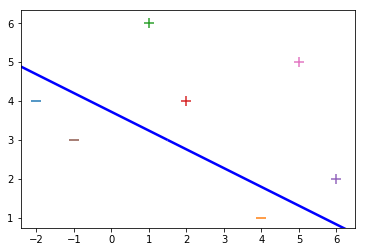

In [4]:
w, out = svm_function(x,y)
for val, inp in enumerate(x): 
    if y[val] == -1:
        plt.scatter(inp[0], inp[1], s=100, marker='_', linewidths=5) 
    else:
        plt.scatter(inp[0], inp[1], s=100, marker='+', linewidths=5)
plt.scatter(-1,3, s=100, marker='_', linewidths=5) 
plt.scatter(5,5, s=100, marker='+', linewidths=5)
x1=[w[0],w[1],-w[1],w[0]] 
x2=[w[0],w[1],w[1],-w[0]]
x1x2 =np.array([x1,x2])
X,Y,U,V = zip(*x1x2)
ax = plt.gca() 
ax.quiver(X,Y,U,V,scale=1, color='blue')

In [11]:
import chainer 
import numpy as np 
import random
num_labels = 10 
num_units = 40 
size_inputs = 28*28
learningrate = 0.05
epoch = 10
train,test = chainer.datasets.get_mnist()
## To put the model in one dictionary, for multi layers, this could be a huge dictionary 
model = {}
model['W1'] = np.random.randn(num_units,size_inputs) / np.sqrt(size_inputs) 
model['W2'] = np.random.randn(num_labels,num_units) / np.sqrt(num_units)

In [12]:
###### This part is the helper functions
###### Note that in this case the b is zero, so we are only doing the W here. 
def sigma_function(Z): 
    # Z needs to be a column
    result = np.exp(Z)/(np.exp(Z)+1) 
    return result
def signma_function_derivative (Z):
    result = np.exp(Z)/((1+np.exp(Z)) ** 2) 
    return result
def softmax_function(Z):
    result = np.exp(Z) / np.sum(np.exp(Z)) 
    return result

In [13]:
def forward_function(X,model): # X needs to be a column 
    Z1 = np.dot(model['W1'],X)
    a = sigma_function(Z1)
    Z2 = np.dot(model['W2'],a)
    f_theta = softmax_function(Z2)
    return a, Z1, Z2, f_theta # the resulting f_theta is also a column
def backward_function(f_theta,correct_label,Z1,X,a,model): 
    delta_3 = -f_theta
    delta_3[correct_label] +=1
    a_grad = signma_function_derivative(Z1)
    delta_2 = np.dot(np.transpose(model['W2']),delta_3) * a_grad 
    W2_delta = np.dot(delta_3, np.transpose(a))
    W1_delta = np.dot(delta_2, np.transpose(X))
    return W1_delta,W2_delta

In [14]:
## This part is the main calculation that makes use of the above functions 
for i in range(0,epoch):
    total_traincorrect = 0
    for n in range(0,len(train)-1):
        n_random = random.randint(0,len(train)-1)
        X = train[n_random][0].reshape(len(train[n_random][0]),1) 
        Y = train[n_random][1]
        a,Z1,Z2,f_theta = forward_function(X,model)
        prediction = np.argmax(f_theta)
        if (prediction == Y): 
            total_traincorrect +=1
        W1_delta,W2_delta = backward_function(f_theta,Y,Z1,X,a,model) 
        model['W1'] += learningrate * W1_delta
        model['W2'] += learningrate * W2_delta
print ("The correctness in the training of this learning set is ", total_traincorrect/np.float(len(train)))

The correctness in the training of this learning set is  0.9821333333333333


In [15]:
total_testcorrect = 0;
for j in range(0,len(test)):
    X = test[j][0].reshape(len(test[j][0]),1)
    Y = test[j][1]
    a,Z1,Z2,f_theta = forward_function(X,model) 
    prediction = np.argmax(f_theta)
    if (prediction ==Y): 
        total_testcorrect+=1
print ("The final correctness in the testing of this network is ", total_testcorrect/np.float(len(test)))

The final correctness in the testing of this network is  0.9701
